In [40]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/gdrive')

# https://covidtracking.com/data/download
data_raw = pd.read_csv('/content/gdrive/MyDrive/data/covid-all-states.csv')

data = data_raw
data['date'] = data['date'].astype('datetime64')

data[:4]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0


In [ ]:
data.dtypes

date                                datetime64[ns]
state                                       object
death                                      float64
deathConfirmed                             float64
deathIncrease                                int64
deathProbable                              float64
hospitalized                               float64
hospitalizedCumulative                     float64
hospitalizedCurrently                      float64
hospitalizedIncrease                         int64
inIcuCumulative                            float64
inIcuCurrently                             float64
negative                                   float64
negativeIncrease                             int64
negativeTestsAntibody                      float64
negativeTestsPeopleAntibody                float64
negativeTestsViral                         float64
onVentilatorCumulative                     float64
onVentilatorCurrently                      float64
positive                       

In [41]:
populations = pd.read_csv('/content/gdrive/MyDrive/data/us-states-population-year.csv')
populations = populations[populations['year'] == 2018]
populations[:8]

,Unnamed: 0,state,year,population
432,433,Alabama,2018.0,4875120
433,434,Alaska,2018.0,739786
434,435,Arizona,2018.0,7048876
435,436,Arkansas,2018.0,3002997
436,437,California,2018.0,39399349
437,438,Colorado,2018.0,5615902
438,439,Connecticut,2018.0,3573880
439,440,Delaware,2018.0,957078


In [42]:
states = pd.read_csv('/content/gdrive/MyDrive/data/us-states-regions-divisions.csv')
states[:8]

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic


In [43]:
data_join = (
    data.merge(states, left_on='state', right_on="State Code")
        .merge(populations, left_on='State', right_on='state')
)
data_join['state_code'] = data_join['state_x']
data_join[:4]

,date,state_x,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsViralIncrease,State,State Code,Region,Division,Unnamed: 0,state_y,year,population,state_code
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
1,2021-03-06,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
2,2021-03-05,AK,305.0,NaN,2,NaN,1293.0,1293.0,33.0,3,...,7144,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
3,2021-03-04,AK,303.0,NaN,0,NaN,1290.0,1290.0,32.0,5,...,13466,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK


,date,state_x,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsViralIncrease,State,State Code,Region,Division,Unnamed: 0,state_y,year,population,state_code
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
1,2021-03-06,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,0,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
2,2021-03-05,AK,305.0,NaN,2,NaN,1293.0,1293.0,33.0,3,...,7144,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK
3,2021-03-04,AK,303.0,NaN,0,NaN,1290.0,1290.0,32.0,5,...,13466,Alaska,AK,West,Pacific,434,Alaska,2018.0,739786,AK


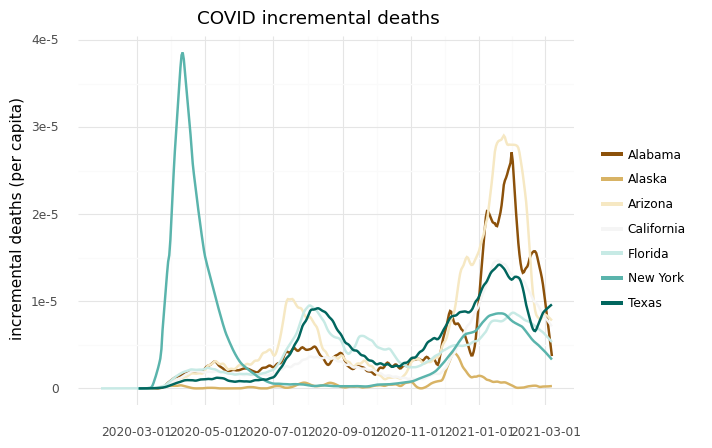

<ggplot: (8753160585415)>

In [44]:
from plotnine import ggplot, aes, geom_line, lims, geom_smooth, labs
from plotnine.themes import theme_set, theme_minimal
from plotnine.scales import scale_color_brewer
import datetime as dt

theme_set(theme_minimal())

#o = data_join[
#    (data_join['state_code'] == 'AK')
#    | (data_join['state_code'] == 'NY')
#    | (data_join['state_code'] == 'FL')
#    | (data_join['state_code'] == 'CA')
#    | (data_join['state_code'] == 'TX')
#    | (data_join['state_code'] == 'AL')
#    | (data_join['state_code'] == 'AZ')
#]
o = data_join[data_join['state_code'].isin(['AK', 'NY', 'FL', 'CA', 'TX', 'AL', 'AZ'])]
display(o[:4])

(ggplot(o)
    + aes(x='date', y='deathIncrease / population', color='State')
    #+ geom_line()
    + geom_smooth(span=0.05, show_legend=True, se=False)
    #+ lims(x=(dt.date(2021, 1, 1), dt.date(2023, 6, 20)))
    + scale_color_brewer(type='div', palette=1)
    + labs(
        title='COVID incremental deaths',
        x='',
        y='incremental deaths (per capita)',
        color='',
    )
)

In [76]:
region_populations = (states
    .merge(populations[populations['year'] == 2018], left_on='State', right_on='state')
    .groupby('Region')
    .agg('sum')
    .reset_index(drop=False)
    [['Region', 'population']]
)
display(region_populations[:4])

regional_data = (data_join
    .groupby(['date', 'Region'])
    .agg('sum')
    .reset_index(drop=False)
    .drop(['population', 'year', 'Unnamed: 0'], axis=1)
    .merge(region_populations, on='Region')
)
display(regional_data[:4])

<ipython-input-76-da27b8ab73fb>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Region,population
0,Midwest,68156035
1,Northeast,56072676
2,South,123598424
3,West,77319986


<ipython-input-76-da27b8ab73fb>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,date,Region,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,population
0,2020-01-13,West,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,77319986
1,2020-01-14,West,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,77319986
2,2020-01-15,West,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,77319986
3,2020-01-16,West,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,77319986


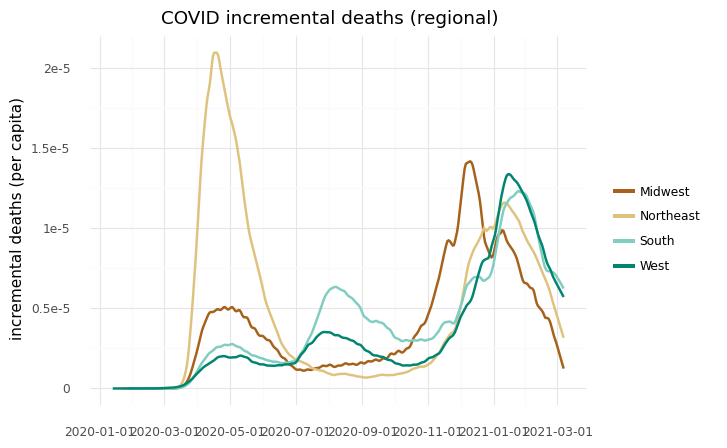

<ggplot: (8753155477538)>

In [78]:
from plotnine import ggplot, aes, geom_smooth
from plotnine.scales import scale_color_brewer

(ggplot(regional_data)
    + aes(x='date', y='deathIncrease / population', color='Region')
    + geom_smooth(span=0.05, show_legend=True, se=False)
    + scale_color_brewer(type='div', palette=1)
    + labs(
        title='COVID incremental deaths (regional)',
        x='',
        y='incremental deaths (per capita)',
        color='',
    )
)